121618 - umuDC Growth Curve Analysis 

In [1]:
#import packages

import datetime
import itertools
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import csv
import seaborn as sns
%matplotlib inline

In [2]:
from functions.data_handling import *
from functions.plots import *

In [3]:
base_file_path = '/Users/mialydefelice/Dropbox/Mialy/Experiments/TranscriptionUnitStructure'
file_name = '121618_UmuD_C_Growth.txt'

In [4]:
df = parse_data_file(file_name, base_file_path)
df

,600
time,"(0:00:00, 0:10:02, 0:20:03, 0:30:03, 0:40:04, ..."
temp,"(37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37...."
A1,"(0.085, 0.084, 0.084, 0.084, 0.084, 0.084, 0.0..."
A2,"(0.083, 0.082, 0.082, 0.082, 0.082, 0.082, 0.0..."
A3,"(0.196, 0.187, 0.119, 0.098, 0.090, 0.083, 0.0..."
A4,"(0.083, 0.083, 0.085, 0.083, 0.083, 0.083, 0.0..."
A5,"(0.084, 0.083, 0.083, 0.083, 0.083, 0.083, 0.0..."
A6,"(0.085, 0.085, 0.085, 0.085, 0.085, 0.085, 0.0..."
A7,"(0.087, 0.087, 0.087, 0.087, 0.087, 0.086, 0.0..."
A8,"(0.085, 0.084, 0.084, 0.084, 0.084, 0.091, 0.0..."


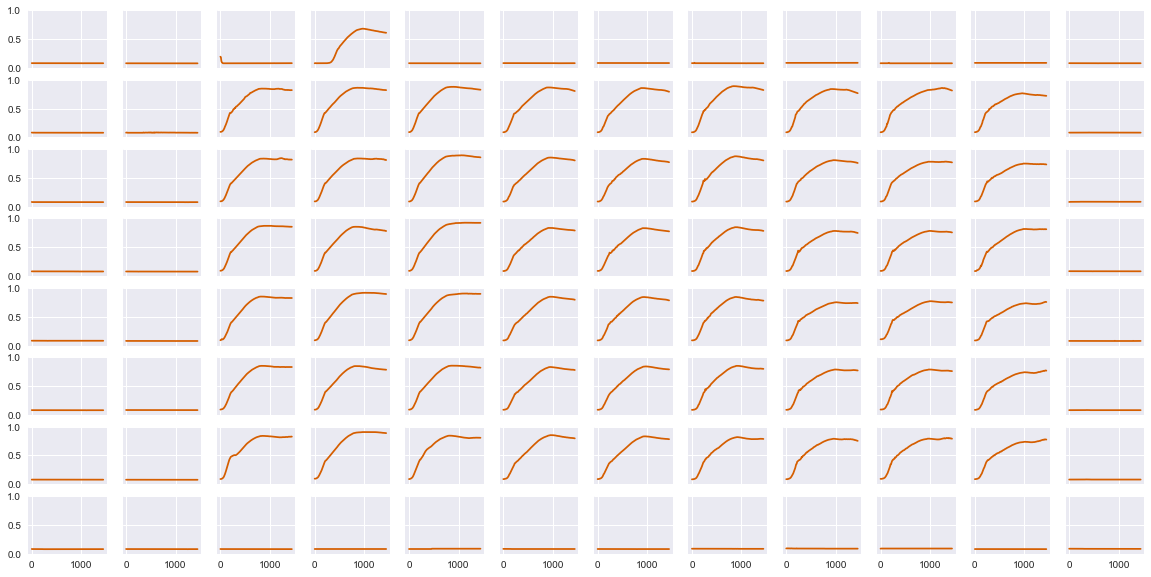

In [6]:
fig_save_path = create_fig_save_folder(base_file_path, file_name)
quick_plot_all_wells(df, fig_save_path, 1)